In [7]:
import asyncio

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# add the root dir to the path
import sys
sys.path.append('../')

In [9]:
result_dir = '../result_summary/'

In [21]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [34]:
for k, v in load_json('../result_summary/am/tsp_20/400000.json').items():
    print(k, v)

0 {'score': 3.6640625, 'runtime': 0.14216828346252441}
1 {'score': 3.76171875, 'runtime': 0.10949182510375977}
10 {'score': 3.791015625, 'runtime': 0.015129566192626953}
11 {'score': 3.76953125, 'runtime': 0.016547441482543945}
12 {'score': 4.078125, 'runtime': 0.021077632904052734}
13 {'score': 3.7109375, 'runtime': 0.017091989517211914}
14 {'score': 4.3828125, 'runtime': 0.01751255989074707}
15 {'score': 4.0859375, 'runtime': 0.021026134490966797}
16 {'score': 4.15625, 'runtime': 0.01702284812927246}
17 {'score': 3.341796875, 'runtime': 0.02202463150024414}
5 {'score': 3.86328125, 'runtime': 0.0981302261352539}
3 {'score': 4.1484375, 'runtime': 0.11114311218261719}
18 {'score': 3.703125, 'runtime': 0.03665971755981445}
2 {'score': 3.779296875, 'runtime': 0.11275649070739746}
19 {'score': 3.873046875, 'runtime': 0.03866291046142578}
20 {'score': 3.876953125, 'runtime': 0.03805994987487793}
21 {'score': 3.482421875, 'runtime': 0.04755973815917969}
22 {'score': 3.859375, 'runtime': 0.05

In [47]:
def parse_all_result(model_type, env_type, problem_size, result_dir='../result_summary/', start=400000, end=500000, step=5000):
    root_dir = f"{result_dir}{model_type}/{env_type}_{problem_size}"
    all_data = {'train_epochs': [], 'score': []}

    for i in range(start, end, step):
        file_path = f"{root_dir}/{i}.json"
        try:
            data = load_json(file_path)

        except:
            continue

        all_data['train_epochs'].append(i)
        all_data['score'].append(data['average']['score'])

    return pd.DataFrame.from_dict(all_data).set_index('train_epochs')

<AxesSubplot: xlabel='train_epochs'>

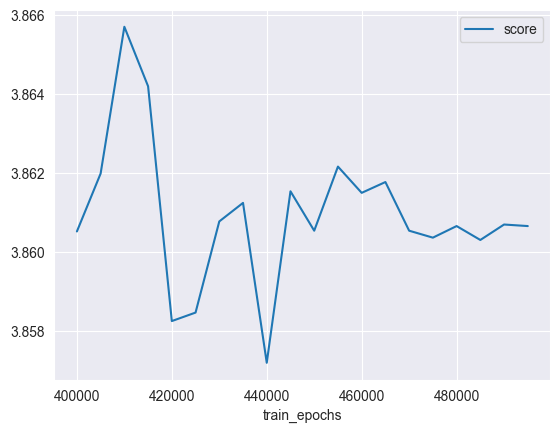

In [48]:
# load json file from result_summary dir as dataframe

am_result_tsp_20 = parse_all_result('am', 'tsp', 20)
am_result_tsp_20.plot()


<AxesSubplot: xlabel='train_epochs'>

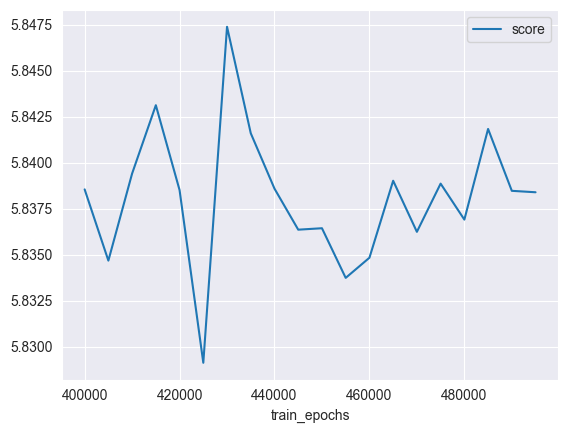

In [49]:
am_result_tsp_50 = parse_all_result('am', 'tsp', 50)
am_result_tsp_50.plot()

<AxesSubplot: xlabel='train_epochs'>

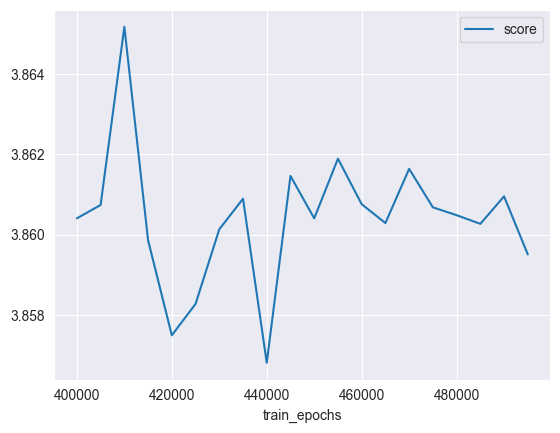

In [50]:
mcts_result_tsp_20 = parse_all_result('mcts', 'tsp', 20)
mcts_result_tsp_20.plot()

<AxesSubplot: xlabel='train_epochs'>

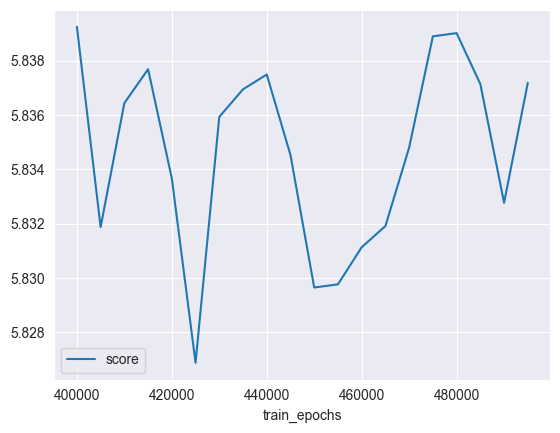

In [51]:
mcts_result_tsp_50 = parse_all_result('mcts', 'tsp', 50)
mcts_result_tsp_50.plot()

<AxesSubplot: xlabel='train_epochs'>

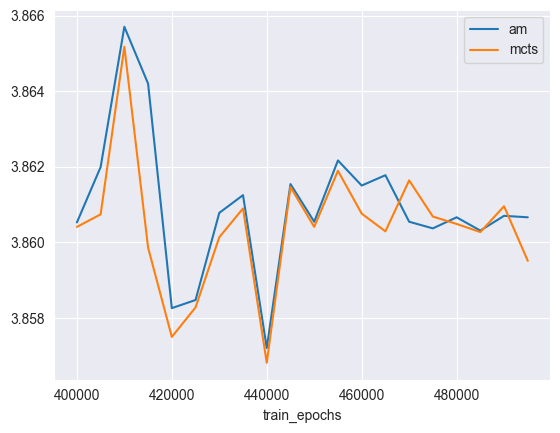

In [52]:
# concat the two dataframes with same problem size
tsp_20 = pd.concat([am_result_tsp_20, mcts_result_tsp_20], axis=1)
tsp_20.columns = ['am', 'mcts']
tsp_20.plot()

<AxesSubplot: xlabel='train_epochs'>

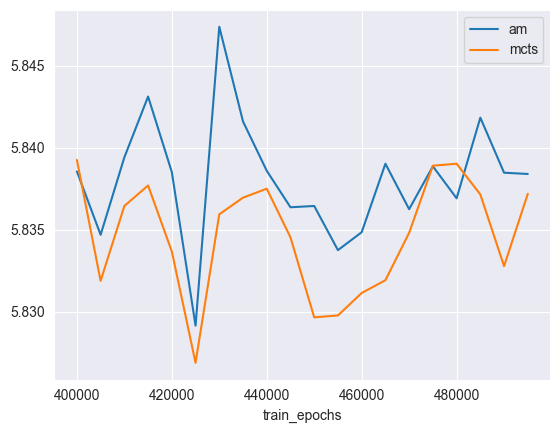

In [53]:
tsp_50 = pd.concat([am_result_tsp_50, mcts_result_tsp_50], axis=1)
tsp_50.columns = ['am', 'mcts']
tsp_50.plot()